In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_circles
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler

In [18]:
class DBSCANClustering:
    def __init__(self, eps=0.5, min_samples=5, metric='euclidean', algorithm='auto', leaf_size=30):
        self.eps = eps
        self.min_samples = min_samples
        self.metric = metric
        self.algorithm = algorithm
        self.leaf_size = leaf_size

    @staticmethod
    def _dbscan_inner(core_points, neighborhoods, labels):
        label, queue = 0, []

        for point in range(len(core_points)):
            # if the point is already assigned a label or not a core point, skip it
            if not core_points[point] or labels[point] != -1:
                continue

            labels[point] = label
            queue.append(point)

            while queue:
                current_point = queue.pop(0)
                # if the point is a core point, get it's neighbors
                if core_points[current_point]:
                    current_neighbors = neighborhoods[current_point]

                    for neighbor in current_neighbors:
                        if labels[neighbor] == -1:
                            labels[neighbor] = label
                            queue.append(neighbor)

            label += 1

    def fit_predict(self, X):
        nn = NearestNeighbors(n_neighbors=self.min_samples, radius=self.eps, metric=self.metric,
                              algorithm=self.algorithm, leaf_size=self.leaf_size)

        # find the neighbors for each point within the given radius
        neighborhoods = nn.fit(X).radius_neighbors(X, return_distance=False)
        labels = np.full(len(X), -1, dtype=np.intp)
        core_points = np.asarray([len(n) >= self.min_samples for n in neighborhoods])

        self._dbscan_inner(core_points, neighborhoods, labels)
        self.labels_ = labels

        return self.labels_

In [19]:
X4, y4 = make_circles(n_samples=250, noise=0.05, factor=0.5, random_state=0)
X4 = StandardScaler().fit_transform(X4)
print(y4)


[1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1
 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1]


In [20]:
dbscan = DBSCANClustering(eps=0.3, min_samples=3)
dbscan_pred_res = dbscan.fit_predict(X4)
dbscan_ari = adjusted_rand_score(y4, dbscan_pred_res)
print(f'Adjusted Rand Score for DBSCAN: {dbscan_ari}', '', sep='\n')
print('prediction', dbscan_pred_res, sep='\n')

Adjusted Rand Score for DBSCAN: 1.0

prediction
[0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1
 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0
 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0]


In [21]:
sk_dbscan = DBSCAN(eps=0.3, min_samples=3)
sk_dbscan_pred_res = sk_dbscan.fit_predict(X4)
sk_dbscan_ari = adjusted_rand_score(y4, sk_dbscan_pred_res)
print(f'Adjusted Rand Score for sk DBSCAN: {sk_dbscan_ari}', '', sep='\n')
print('prediction', sk_dbscan_pred_res, sep='\n')

Adjusted Rand Score for sk DBSCAN: 1.0

prediction
[0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1
 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0
 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0]


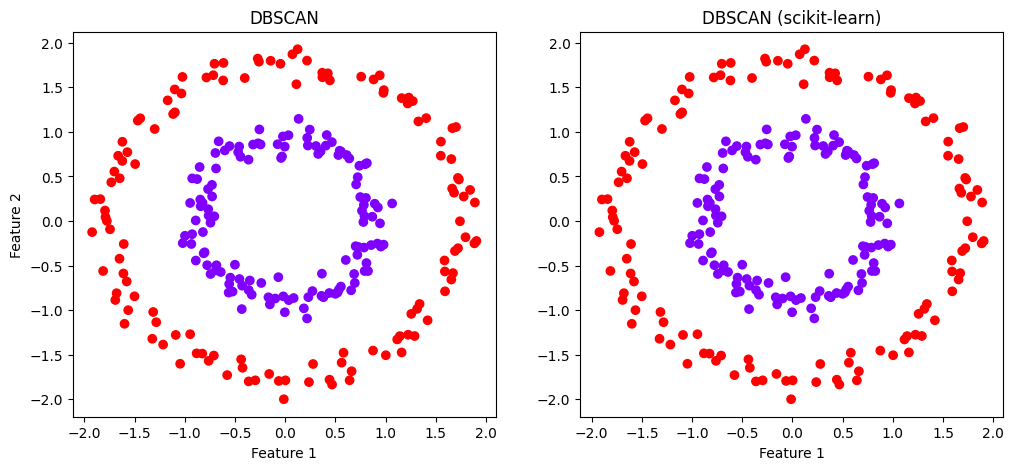

In [22]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X4[:, 0], X4[:, 1], c=dbscan_pred_res, cmap='rainbow')
plt.title('DBSCAN')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X4[:, 0], X4[:, 1], c=sk_dbscan_pred_res, cmap='rainbow')
plt.title('DBSCAN (scikit-learn)')
plt.xlabel("Feature 1")

plt.show()